# CS 210 PROJECT GROUP 52 #

#PRESIDENTIAL ELECTION ANALYSIS WITH REAL AND SURVEY RESULTS #

1.   KEREM TUĞRUL ENÜNLÜ (30750)
2.   EGE GÜNEŞ (29382)
1.   EFE ÖLGE (29473)
2.   MELİS PEHLİVAN (28878)
1.   TİMUR CAN TURUT (30930)
2.   AYÇA ERGİN (27016)
2.   UFUK ÖZDEK (29498)




Welcome to our CS210 project. In this project, we aimed to conduct an experiment about this year's presidental elections that had taken place on the 14th of May 2023. We wanted to find out how proportional the results were with the surveys that were made about this election and also aimed to check these surveys' vote distributions as time went by.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import math
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import f1_score


We had 2 main CSV files for our project. One of them is the recorded real results of the election on the 14th of May 2023, which was taken by YSK. The other file was created by us by merging several surveys of different dates about the elections. They were both used in different sections seperately and together.

In [ ]:
File = "/content/14th_of_May.csv"
df14 = pd.read_csv(File)

File2 = "/content/test.csv"
dfSurvey = pd.read_csv(File2)

The next 8 blocks of our code, shows us the highest and the lowest percentage of votes acquired by our 4 candidates in all surveys in respective order. Only the highest and the lowest 5 were shown.



Kılıçdaroğlu's Highest 5

In [ ]:
# Sorting the Dataframe by 'Kılıçdaroğlu' column in descending order
sorted_surveys = dfSurvey.sort_values('Kılıçdaroğlu', ascending=False)

# Selecting the top 5 surveys where Kılıçdaroğlu received the most votes
top_5_surveys = sorted_surveys.head(5)

# Printing the top 5 surveys
print(top_5_surveys[['Date','Survey Company', 'Kılıçdaroğlu']])


         Date Survey Company  Kılıçdaroğlu
3   11-13 May         Remres          53.6
89  12-17 Mar        Avrasya          53.5
71    1-2 Nis         Gezici          53.4
90  11-15 Mar            ORC          53.1
17   3-10 May         Remres          52.1


Erdoğan's highest 5

In [ ]:
# Sorting the Dataframe by 'Erdoğan' column in descending order
sorted_surveys = dfSurvey.sort_values('Erdoğan', ascending=False)

# Selecting the top 5 surveys where Erdoğan received the most votes
top_5_surveys = sorted_surveys.head(5)

# Printing the top 5 surveys
print(top_5_surveys[['Date','Survey Company', 'Erdoğan']])

         Date Survey Company  Erdoğan
55  15-20 Nis   Areda Survey     51.4
9   10-11 May          GENAR     51.4
6   11-12 May   Areda Survey     51.3
45  25-27 Nis   Areda Survey     51.1
62  12-14 Nis   Areda Survey     50.8


Muharrem İnce's top 5

In [ ]:
# Sorting the Dataframe by 'İnce' column in descending order
sorted_surveys = dfSurvey.sort_values('İnce', ascending=False)

# Selecting the top 5 surveys where İnce received the most votes
top_5_surveys = sorted_surveys.head(5)

# Printing the top 5 surveys
print(top_5_surveys[['Date','Survey Company', 'İnce']])

         Date Survey Company  İnce
92       Mart           TEAM  16.2
86  17-21 Mar           Area  13.1
68    1-5 Nis           Area  12.7
74      Nisan           TEAM  12.1
67    3-6 Nis            İEA  11.0


Sinan Oğan's top 5

In [ ]:
# Sorting the Dataframe by 'Oğan' column in descending order
sorted_surveys = dfSurvey.sort_values('Oğan', ascending=False)

# Selecting the top 5 surveys where Oğan received the most votes
top_5_surveys = sorted_surveys.head(5)

# Printing the top 5 surveys
print(top_5_surveys[['Date','Survey Company', 'Oğan']])

         Date Survey Company  Oğan
94       Mart         Themis  12.2
21    6-9 May            İEA   6.5
2   12-13 May        Özdemir   6.4
8    9-12 May          Aksoy   5.7
5   11-12 May       BETİMAR    5.6


Kılıçdaroğlu's lowest 5

In [ ]:
# Sorting the Dataframe by 'Kılıçdaroğlu' column in ascending order
sorted_surveys = dfSurvey.sort_values('Kılıçdaroğlu', ascending=True)

# Selecting the bottom 5 surveys where Kılıçdaroğlu received the fewest votes
bottom_5_surveys = sorted_surveys.head(5)

# Printing the bottom 5 surveys
print(bottom_5_surveys[['Date', 'Survey Company', 'Kılıçdaroğlu']])


             Date Survey Company  Kılıçdaroğlu
94           Mart         Themis          36.8
92           Mart           TEAM          39.9
80      27-30 Mar         Areda           41.5
86      17-21 Mar           Area          41.7
73  28 Mart-1 Nis   Areda Survey          41.8


Erdoğan's lowest 5

In [ ]:
# Sorting the Dataframe by 'Erdoğan' column in ascending order
sorted_surveys = dfSurvey.sort_values('Erdoğan', ascending=True)

# Selecting the bottom 5 surveys where Erdoğan received the fewest votes
bottom_5_surveys = sorted_surveys.head(5)

# Printing the bottom 5 surveys
print(bottom_5_surveys[['Date', 'Survey Company', 'Erdoğan']])


         Date Survey Company  Erdoğan
94       Mart         Themis     32.1
75      Nisan          Aksoy     38.4
89  12-17 Mar        Avrasya     39.7
52  15-24 Nis          Bulgu     41.5
64   7-11 Nis            ORC     41.5


Muharrem İnce's lowest 5

In [ ]:
# Sorting the Dataframe by 'İnce' column in ascending order
sorted_surveys = dfSurvey.sort_values('İnce', ascending=True)

# Selecting the bottom 5 surveys where İnce received the fewest votes
bottom_5_surveys = sorted_surveys.head(5)

# Printing the bottom 5 surveys
print(bottom_5_surveys[['Date', 'Survey Company', 'İnce']])


        Date           Survey Company  İnce
3  11-13 May                   Remres  0.10
5  11-12 May                 BETİMAR   0.30
0   14 Mayıs  Cumhurbaşkanlığı seçimi  0.43
6  11-12 May             Areda Survey  0.60
8   9-12 May                    Aksoy  0.80


Sinan Oğan's lowest 5

In [ ]:
# Sorting the Dataframe by 'Oğan' column in ascending order
sorted_surveys = dfSurvey.sort_values('Oğan', ascending=True)

# Selecting the bottom 5 surveys where Oğan received the fewest votes
bottom_5_surveys = sorted_surveys.head(5)

# Printing the bottom 5 surveys
print(bottom_5_surveys[['Date', 'Survey Company', 'Oğan']])


         Date Survey Company  Oğan
88  13-18 Mar        Optimar   0.7
92       Mart           TEAM   1.1
50  17-25 Nis         TÜSİAR   1.1
44  24-28 Nis  Sosyo Politik   1.2
87  13-21 Mar        Artıbir   1.2


The following graph shows the distribution and the difference between the votes of the 4 candidates before and after Muharrem İnce's withdrawal from his position as presidential candidate.

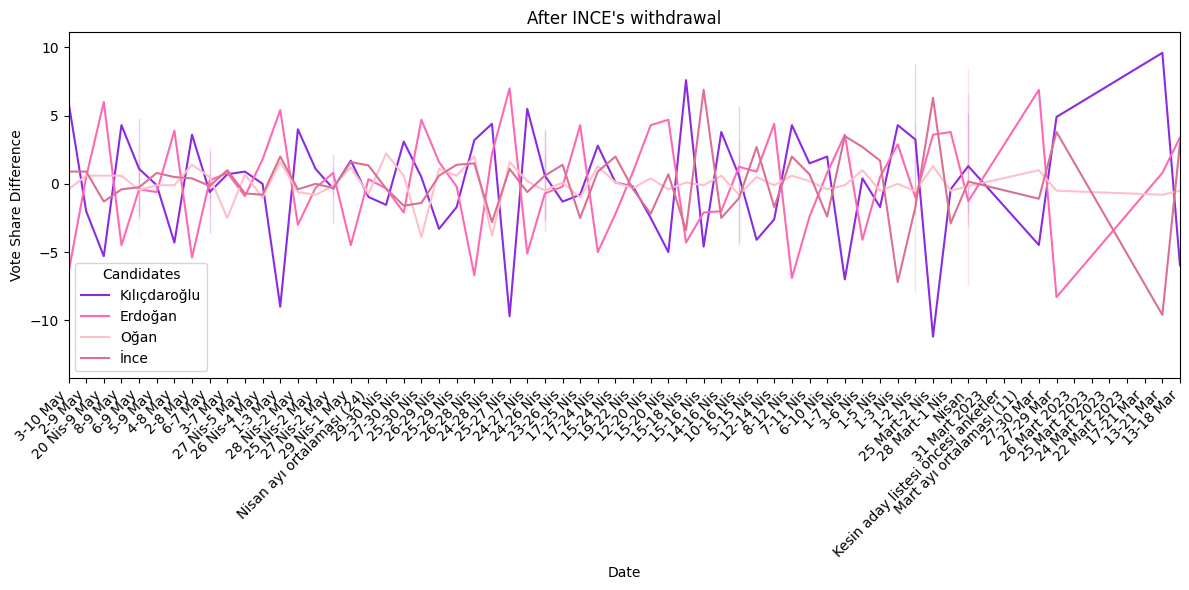

In [ ]:

#The difference in vote shares between consecutive rows
dfSurvey['Kılıçdaroğlu_diff'] = dfSurvey['Kılıçdaroğlu'].diff()
dfSurvey['Erdoğan_diff'] = dfSurvey['Erdoğan'].diff()
dfSurvey['Oğan_diff'] = dfSurvey['Oğan'].diff()
dfSurvey['İnce_diff'] = dfSurvey['İnce'].diff()

# Filtering the Dataframe to include rows after the 14th row
filtered_df = dfSurvey.iloc[14:]

#Purple and pink shades
colors = ['#8A2BE2', '#FF69B4', '#FFC0CB', '#DB7093']

plt.figure(figsize=(12, 6))
for i, candidate in enumerate(['Kılıçdaroğlu_diff', 'Erdoğan_diff', 'Oğan_diff', 'İnce_diff']):
    sns.lineplot(data=filtered_df, x='Date', y=candidate, label=candidate.replace('_diff', ''), color=colors[i])

plt.title("After INCE's withdrawal")
plt.xlabel('Date')
plt.ylabel('Vote Share Difference')
plt.xticks(rotation=45, ha='right')  

# Removing the first 3 dates from the left and the last 6 dates from the right side of the x-axis
plt.xlim(filtered_df['Date'].values[3], filtered_df['Date'].values[-10])

plt.legend(title='Candidates')
plt.tight_layout()  

plt.show()


These are the content columns of our 2 CSV files. We did a check-up of the content the see whether we needed to make an adjustment to our files.

In [ ]:

df14.info()
print("")
dfSurvey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   İl Id                      162 non-null    object 
 1   İl Adı                     162 non-null    object 
 2   Kayıtlı Seçmen Sayısı      162 non-null    object 
 3   Oy Kullanan Seçmen Sayısı  162 non-null    object 
 4   Geçerli Oy Toplamı         162 non-null    object 
 5    RECEP TAYYİP ERDOĞAN      81 non-null     object 
 6    MUHARREM İNCE             81 non-null     float64
 7    KEMAL KILIÇDAROĞLU        81 non-null     object 
 8    SİNAN OĞAN                81 non-null     float64
dtypes: float64(2), object(7)
memory usage: 11.5+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Table 1            0 n

We stumbled upon empty and useless columns in both of our datasets. So we dropped the unused categories.

In [ ]:

df14 = df14.drop('İl Id', axis=1)
dfSurvey = dfSurvey.drop('Unnamed: 9', axis=1)
dfSurvey = dfSurvey.drop('Table 1', axis=1)

df14.info()
print("")
dfSurvey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   İl Adı                     162 non-null    object 
 1   Kayıtlı Seçmen Sayısı      162 non-null    object 
 2   Oy Kullanan Seçmen Sayısı  162 non-null    object 
 3   Geçerli Oy Toplamı         162 non-null    object 
 4    RECEP TAYYİP ERDOĞAN      81 non-null     object 
 5    MUHARREM İNCE             81 non-null     float64
 6    KEMAL KILIÇDAROĞLU        81 non-null     object 
 7    SİNAN OĞAN                81 non-null     float64
dtypes: float64(2), object(6)
memory usage: 10.2+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               98 non-null     object 
 1   Survey Company     98 non-null

The remaining head content of the election results CSV file.

In [ ]:
df14.head()

,İl Adı,Kayıtlı Seçmen Sayısı,Oy Kullanan Seçmen Sayısı,Geçerli Oy Toplamı,RECEP TAYYİP ERDOĞAN,MUHARREM İNCE,KEMAL KILIÇDAROĞLU,SİNAN OĞAN
0,ADANA,1.615.326,1.414.720,1.388.925,610.132,5.110,706.780,66.903
1,%43.92,%0.36,%50.88,%4.81,NaN,NaN,NaN,NaN
2,ADIYAMAN,399.303,327.349,319.326,211.389,1.203,99.771,6.963
3,%66.19,%0.37,%31.24,%2.18,NaN,NaN,NaN,NaN
4,AFYONKARAHİSAR,536.910,484.078,472.801,301.941,2.642,136.507,31.711


The remaining head content of the survey results CSV file.

In [ ]:
dfSurvey.head()

,Date,Survey Company,Capacity,Erdoğan,İnce,Kılıçdaroğlu,Oğan,Difference,Kılıçdaroğlu_diff,Erdoğan_diff,Oğan_diff,İnce_diff
0,14 Mayıs,Cumhurbaşkanlığı seçimi,"54,796,049",49.52,0.43,44.88,5.17,4.64,NaN,NaN,NaN,NaN
1,Mayıs ayı ortalaması (27),Mayıs ayı ortalaması (27),NaN,46.80,1.79,47.96,3.45,1.16,3.08,-2.72,-1.72,1.36
2,12-13 May,Özdemir,"3,016",48.40,NaN,45.20,6.40,3.20,-2.76,1.60,2.95,NaN
3,11-13 May,Remres,"4,764",44.40,0.10,53.60,1.90,9.20,8.40,-4.00,-4.50,NaN
4,12 May,İEA,"1,500",45.60,NaN,50.50,3.90,4.90,-3.10,1.20,2.00,NaN


This graph shows the distribution of the candidates votes in the country. As can be seen, there is not much of an order for the distribution since all different regions in the country have voted for different candidates at different rates.

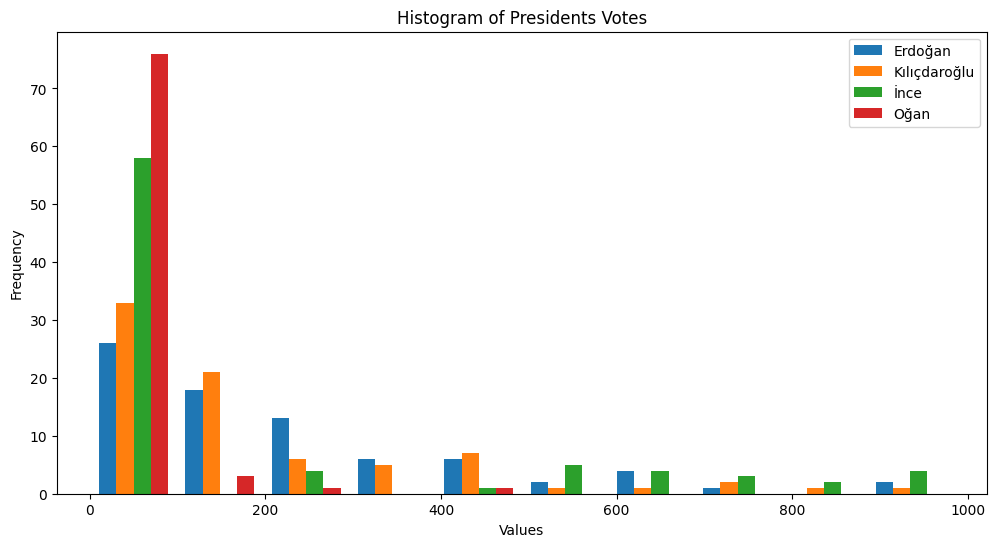

In [ ]:
category1 = pd.to_numeric(df14[' RECEP TAYYİP ERDOĞAN '], errors='coerce')
category2 = pd.to_numeric(df14[' KEMAL KILIÇDAROĞLU '], errors='coerce')
category3 = pd.to_numeric(df14[' MUHARREM İNCE '], errors='coerce')
category4 = pd.to_numeric(df14[' SİNAN OĞAN '], errors='coerce')

plt.figure(figsize=(12,6))

categories = [category1, category2, category3, category4]

labels = ['Erdoğan', 'Kılıçdaroğlu', 'İnce', 'Oğan']

plt.hist(categories, bins=10, label=labels)

plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Presidents Votes')

plt.legend()
plt.show()

This graph show us the distribution of votes for each candidate according to our surveys' results. As can be seen, there is a considerable difference between Kılıçdaroğlu-Erdoğan and Oğan-İnce. The first duo's votes never fell short of 30% and for the latter group, never was able to pass up 20%. 

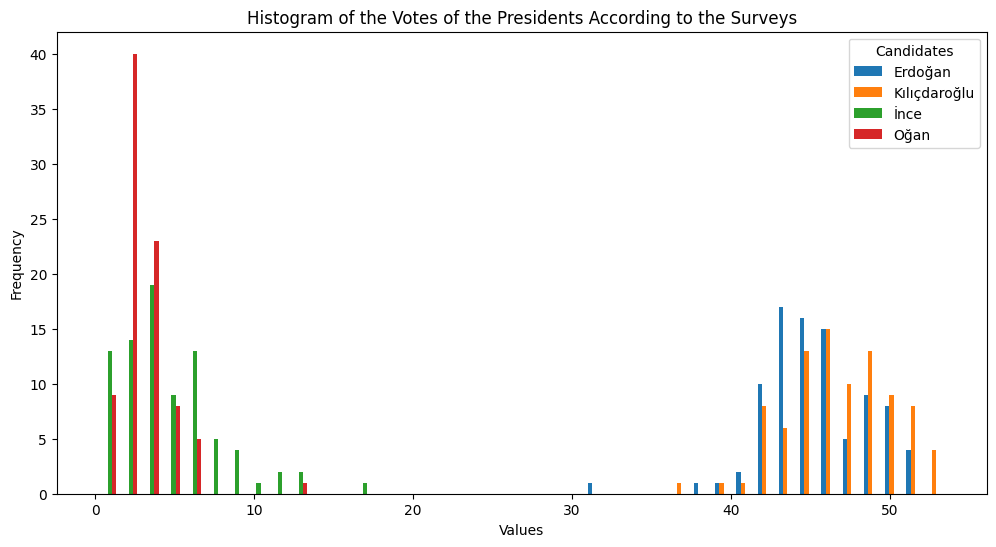

In [ ]:
# Extracting the survey results for each candidate
meanE = dfSurvey['Erdoğan']
meanK = dfSurvey['Kılıçdaroğlu']
meanI = dfSurvey['İnce']
meanO = dfSurvey['Oğan']

categories = [meanE, meanK, meanI, meanO]

data = pd.DataFrame({'Erdogan': meanE, 'Kilicdaroglu':  meanK, 'Ince':  meanI, 'Ogan':  meanO})

plt.figure(figsize=(12, 6))
plt.hist(data, bins=40)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of the Votes of the Presidents According to the Surveys')
plt.legend(title='Candidates', labels=['Erdoğan', 'Kılıçdaroğlu', 'İnce', 'Oğan'])

plt.show()

This graph shows us the ratio of similarity to the first row of the surveys.

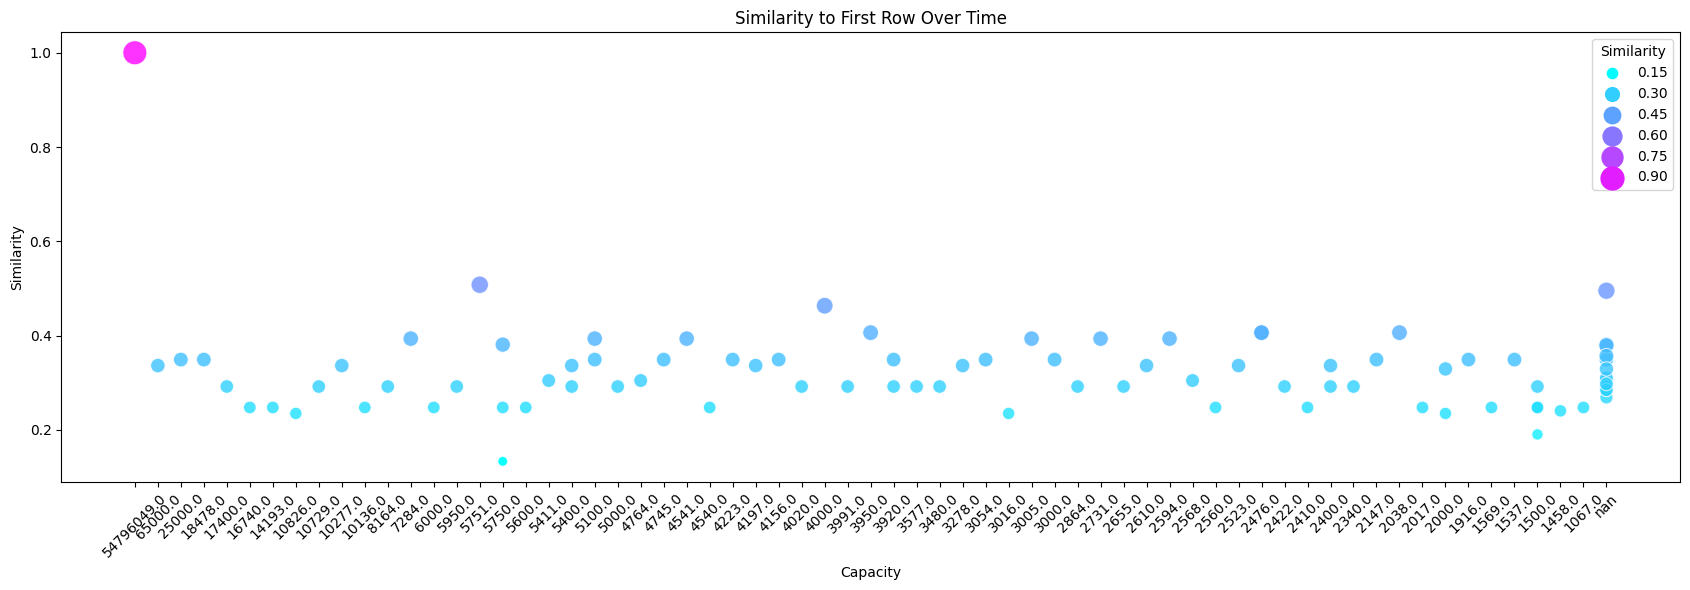

In [ ]:
from difflib import SequenceMatcher

# Calculating similarity of each row
def similarity_to_first(row):
    first_row = dfSurvey.iloc[0]
    similarity = 0
    
    if not pd.isnull(first_row['Erdoğan']) and not pd.isnull(row['Erdoğan']):
        similarity += SequenceMatcher(None, str(first_row['Erdoğan']), str(row['Erdoğan'])).ratio()
    
    if not pd.isnull(first_row['İnce']) and not pd.isnull(row['İnce']):
        similarity += SequenceMatcher(None, str(first_row['İnce']), str(row['İnce'])).ratio()
    
    if not pd.isnull(first_row['Kılıçdaroğlu']) and not pd.isnull(row['Kılıçdaroğlu']):
        similarity += SequenceMatcher(None, str(first_row['Kılıçdaroğlu']), str(row['Kılıçdaroğlu'])).ratio()
    
    if not pd.isnull(first_row['Oğan']) and not pd.isnull(row['Oğan']):
        similarity += SequenceMatcher(None, str(first_row['Oğan']), str(row['Oğan'])).ratio()
    
    if not pd.isnull(first_row['Capacity']) and not pd.isnull(row['Capacity']):
        first_capacity = float(first_row['Capacity'].replace(',', ''))
        row_capacity = float(row['Capacity'].replace(',', ''))
        if first_capacity == row_capacity:
            similarity += 1
    
    if similarity == 0:
        return float('nan')
    else:
        return similarity / 5

# Adding a new column 'Similarity to First'
dfSurvey['Similarity to First'] = dfSurvey.apply(similarity_to_first, axis=1)

# Converting 'Capacity' to numeric to sort them
dfSurvey['Capacity'] = dfSurvey['Capacity'].str.replace(',', '').astype(float)

# Sorting it by Capacity in descending order
dfSurvey.sort_values('Capacity', ascending=False, inplace=True)

# Converting 'Capacity' back to string for plotting
dfSurvey['Capacity'] = dfSurvey['Capacity'].astype(str)

plt.figure(figsize=(17, 6))
sns.scatterplot(data=dfSurvey, x='Capacity', y='Similarity to First', hue='Similarity to First',
                palette='cool', size='Similarity to First', sizes=(50, 300), alpha=0.8)
plt.title('Similarity to First Row Over Time')
plt.xlabel('Capacity')
plt.ylabel('Similarity')
plt.xticks(rotation=45)
plt.legend(title='Similarity', loc='upper right')
plt.tight_layout()

plt.show()


We wanted to see the relationship between the 2 major candidates in this election, who are Erdoğan and Kılıçdaroğlu, by checking out the change of their overall difference in percentage of votes. It seems that the spread started to decline in time as we got closer towards the election day.

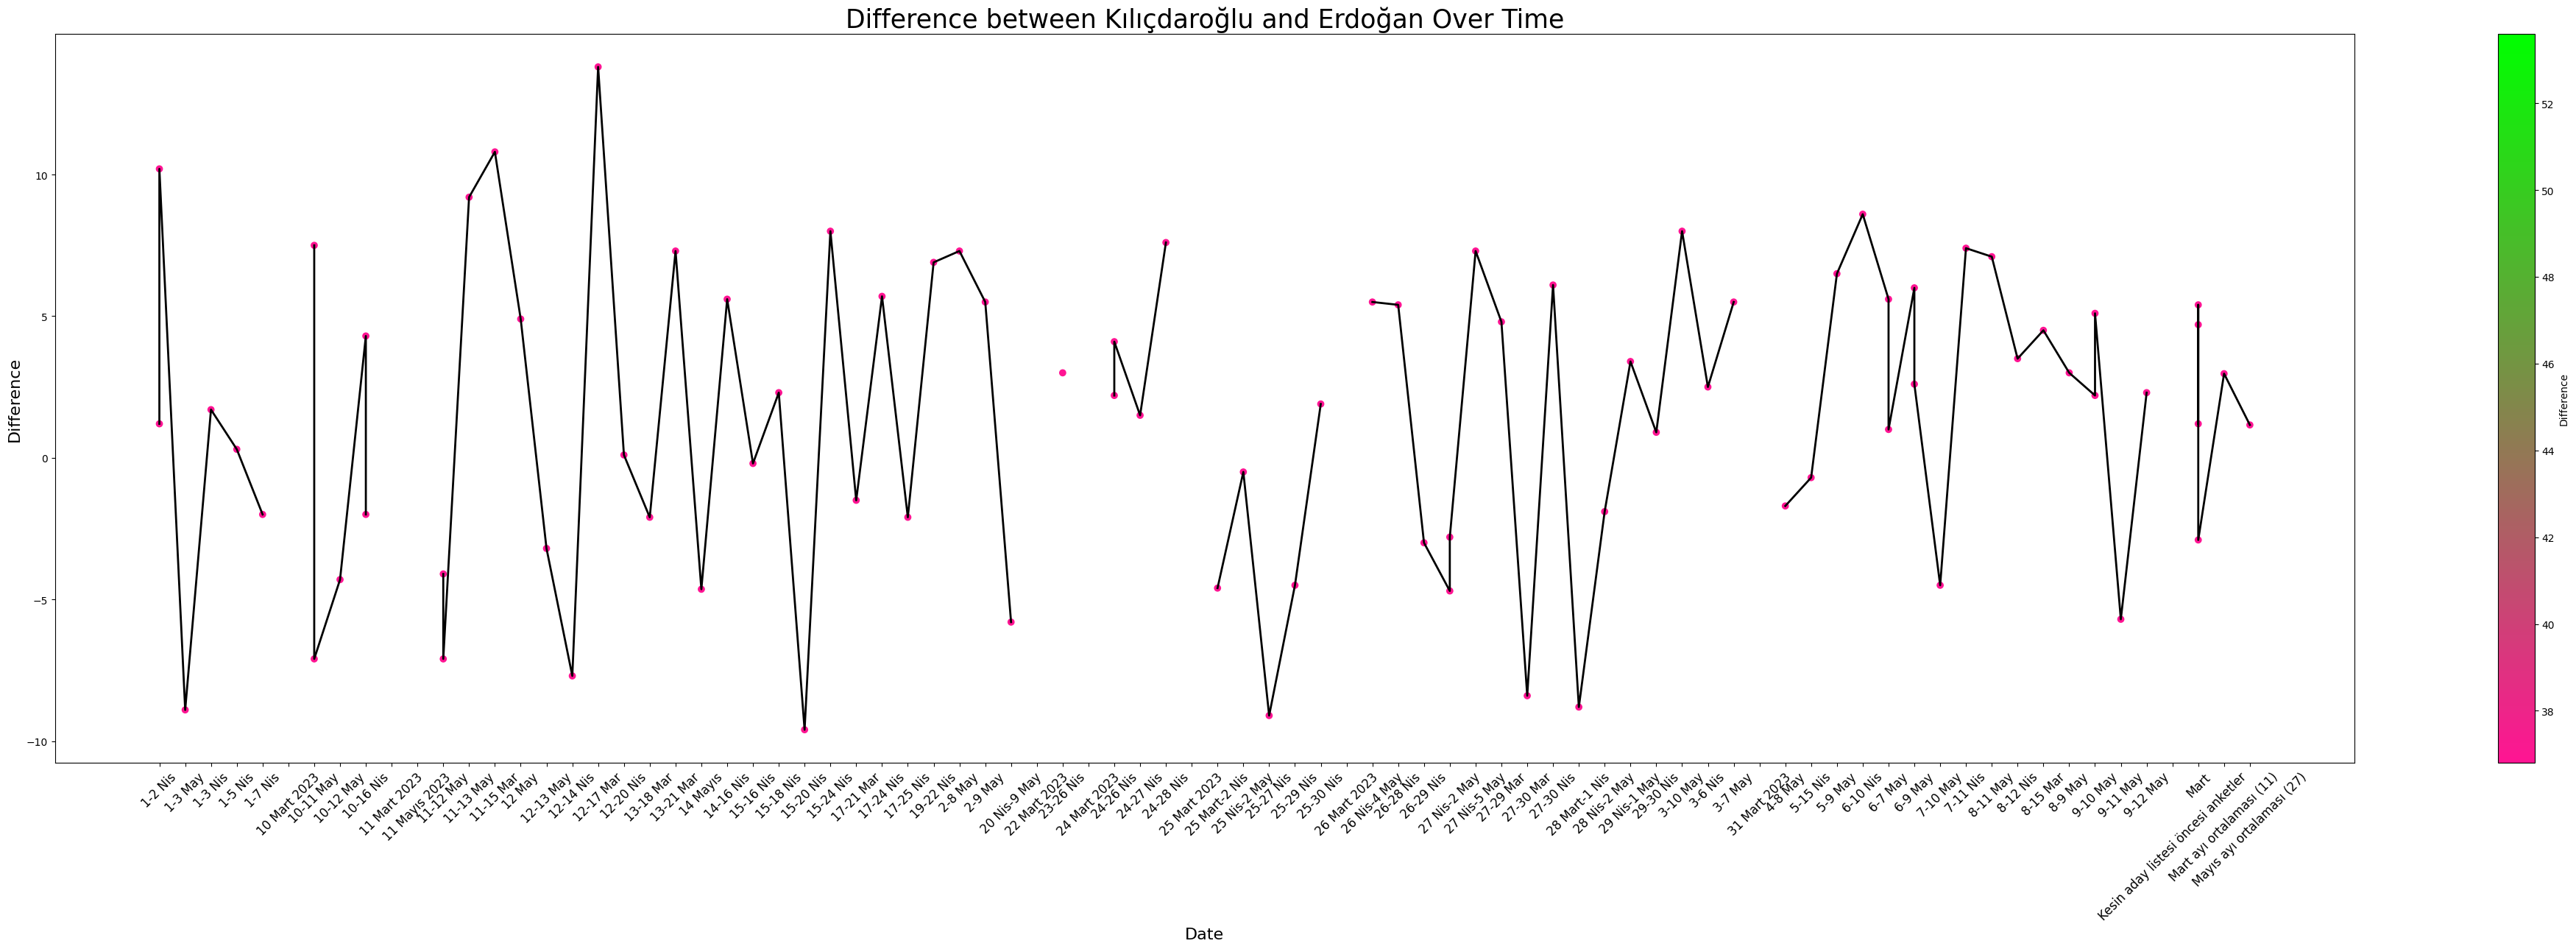

In [ ]:
import matplotlib.colors as mcolors

# Sorting Dataframe by date in ascending order
dfSurvey.sort_values('Date', inplace=True)
cmap = mcolors.LinearSegmentedColormap.from_list("my_cmap", ["#FF1493", "#00FF00"]) 

# Generating gradient colors based on the difference values
norm = plt.Normalize(dfSurvey['Kılıçdaroğlu'][:-4].min(), dfSurvey['Kılıçdaroğlu'][:-4].max())
colors = cmap(norm(dfSurvey['Kılıçdaroğlu'][:-4] - dfSurvey['Erdoğan'][:-4]))

# Ploting the difference between Kılıçdaroğlu and Erdoğan over time
fig, ax = plt.subplots(figsize=(40, 13))
line = ax.plot(dfSurvey['Date'][:-4], dfSurvey['Kılıçdaroğlu'][:-4] - dfSurvey['Erdoğan'][:-4], color='black', linewidth=2)
ax.scatter(dfSurvey['Date'][:-4], dfSurvey['Kılıçdaroğlu'][:-4] - dfSurvey['Erdoğan'][:-4], c=colors)

# Creating a colorbar for the gradient colors
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label("Difference")

ax.set_title("Difference between Kılıçdaroğlu and Erdoğan Over Time", fontsize=25)
ax.set_xlabel("Date", fontsize=16)
ax.set_ylabel("Difference", fontsize=16)
ax.tick_params(axis='x', rotation=45, labelsize=12)

plt.tight_layout()
plt.show()


This graph will give us information about the amount of difference between the real results and the results of the top 5 survey companies with the least amount of difference calculated in percentages.  

Survey Company
TEAM                        0.763545
Mart ayı ortalaması (11)    1.137037
KONDA                       1.202897
İEA                         1.470714
Area                        1.603595
dtype: float64



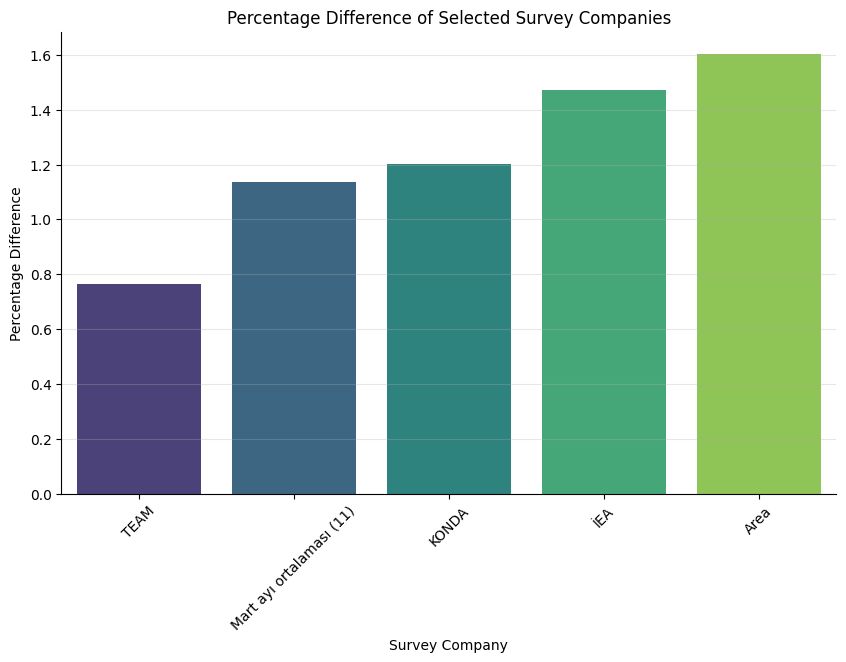

In [ ]:
# Calculating mean for survey companies
mean_results = dfSurvey.groupby('Survey Company').mean(numeric_only=True)

# Calculating the number of surveys conducted by each survey company
survey_counts = dfSurvey['Survey Company'].value_counts()

# Filtering the mean results to include only survey companies with more than 1 survey
mean_results_filtered = mean_results.loc[survey_counts > 1]

# If a survey company has only 1 survey, we'll use that single survey result
single_survey_results = mean_results.loc[survey_counts == 1]

# Concatenating the filtered mean results with the single survey results
combined_results = pd.concat([mean_results_filtered, single_survey_results])

# Calculating the absolute differences between the combined results and the actual results
diff = combined_results.subtract(dfSurvey.iloc[0, 2:], axis=1).abs()

# Sorting the differences in ascending order and select the top 5 closest survey companies
top_5_survey_companies = diff.mean(axis=1).nsmallest(5)

print(top_5_survey_companies)
print("")

# Seting custom color palette with gradient
colors = sns.color_palette("viridis", len(top_5_survey_companies))

# Plot with gradient box effect
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_survey_companies.index, y=top_5_survey_companies.values, palette=colors)

plt.xticks(rotation=45)
plt.xlabel('Survey Company')
plt.ylabel('Percentage Difference')
plt.title('Percentage Difference of Selected Survey Companies')

# Removing the spines (border lines) of the plot
sns.despine()

plt.tick_params(top=False, right=False)

plt.grid(axis='y', alpha=0.3)
plt.show()


This graph shows us the vote distribution of Recep Tayyip Erdoğan and Kemal Kılıçdaroğlu in the 5 most populated provinces by percentage which is totally different from the eventual result.

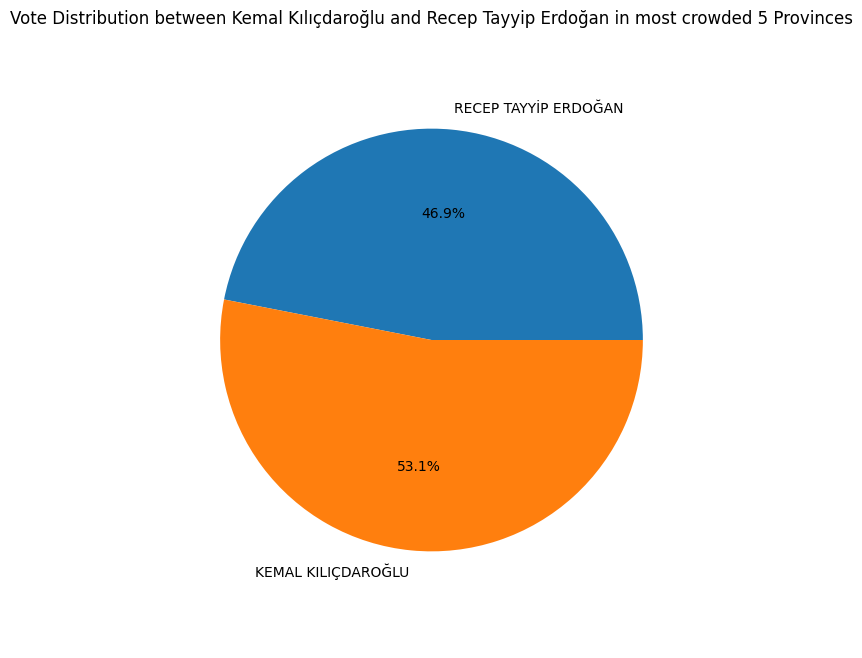

In [ ]:
import warnings
warnings.filterwarnings("ignore")
# Creating a copy of the relevant columns in a new Dataframe
selected_provinces = df14[['İl Adı', 'Oy Kullanan Seçmen Sayısı', ' RECEP TAYYİP ERDOĞAN ', ' KEMAL KILIÇDAROĞLU ']].copy()

# Cleaning the 'Oy Kullanan Seçmen Sayısı' column
selected_provinces['Oy Kullanan Seçmen Sayısı'] = selected_provinces['Oy Kullanan Seçmen Sayısı'].str.replace('.', '')
selected_provinces['Oy Kullanan Seçmen Sayısı'] = selected_provinces['Oy Kullanan Seçmen Sayısı'].str.replace('%', '')

# Converting the 'Oy Kullanan Seçmen Sayısı' column to integer
selected_provinces['Oy Kullanan Seçmen Sayısı'] = selected_provinces['Oy Kullanan Seçmen Sayısı'].astype(int)

selected_provinces[' RECEP TAYYİP ERDOĞAN '] = selected_provinces[' RECEP TAYYİP ERDOĞAN '].str.replace('.', '')
selected_provinces[' KEMAL KILIÇDAROĞLU '] = selected_provinces[' KEMAL KILIÇDAROĞLU '].str.replace('.', '')

# Converting vote columns to float values
selected_provinces[' RECEP TAYYİP ERDOĞAN '] = selected_provinces[' RECEP TAYYİP ERDOĞAN '].astype(float)
selected_provinces[' KEMAL KILIÇDAROĞLU '] = selected_provinces[' KEMAL KILIÇDAROĞLU '].astype(float)

sorted_df = selected_provinces.sort_values(by='Oy Kullanan Seçmen Sayısı', ascending=False)
top5_provinces = sorted_df['İl Adı'].head(5).tolist()

# Creating a Dataframe for the top 5 crowded provinces
selected_provinces = selected_provinces[selected_provinces['İl Adı'].isin(top5_provinces)].copy()

# Calculating the total votes for Kemal Kılıçdaroğlu and Recep Tayyip Erdoğan in the top 5 crowded provinces
recep_votes = selected_provinces[' RECEP TAYYİP ERDOĞAN '].sum()
kemal_votes = selected_provinces[' KEMAL KILIÇDAROĞLU '].sum()

votes = {
    'RECEP TAYYİP ERDOĞAN': recep_votes,
    'KEMAL KILIÇDAROĞLU': kemal_votes
}

plt.figure(figsize=(6,8))
plt.pie(votes.values(), labels=votes.keys(), autopct='%1.1f%%')
plt.title('Vote Distribution between Kemal Kılıçdaroğlu and Recep Tayyip Erdoğan in most crowded 5 Provinces')
plt.axis('equal') 
plt.show()

This graph retrieves the 14th May Turkish Election Results for each city. Each city bar shows the total amount of votes that it has and distributes them proportionally to the respective candidate. Moreover, each bar consists of different colors which is an indicator of how each candidate performed for that particular city.

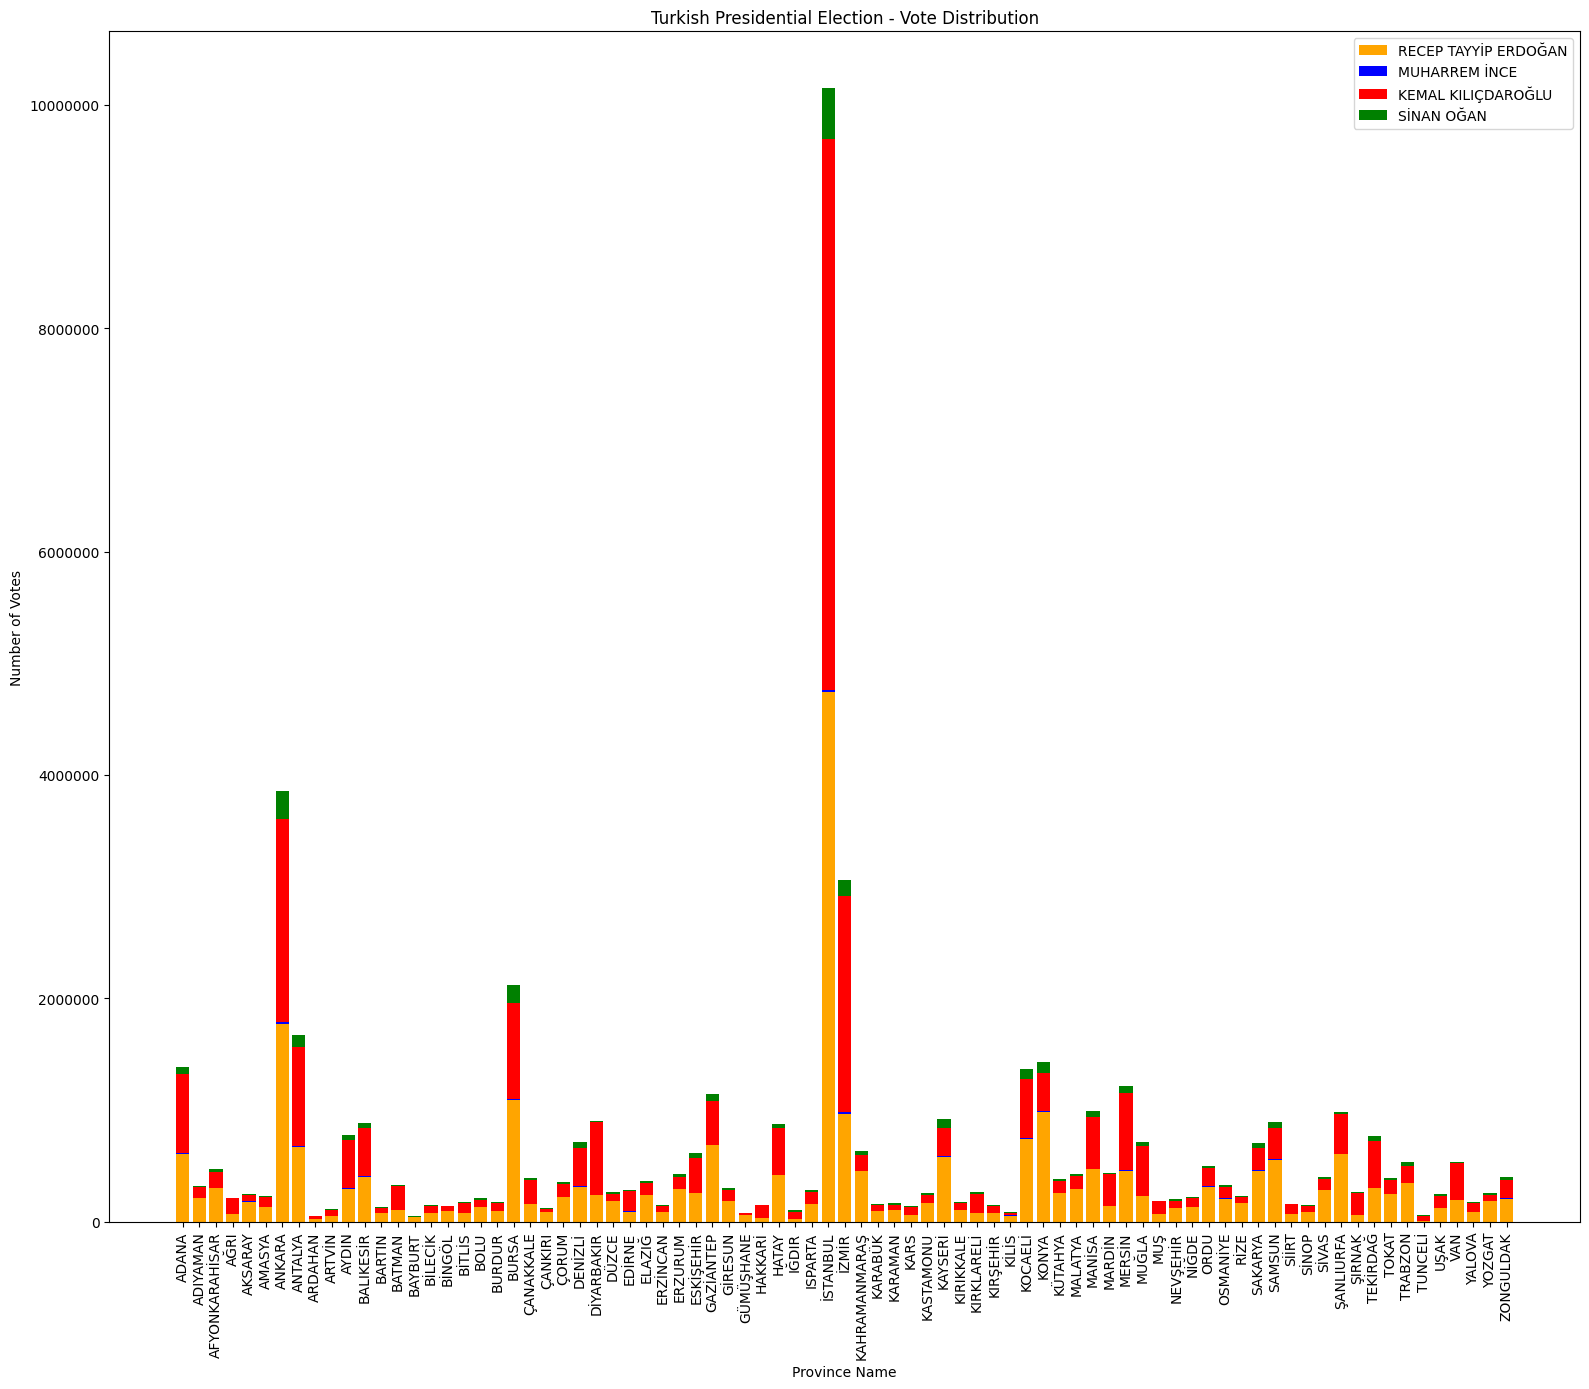

In [ ]:
path = "/content/14th_of_May.csv"
df14 = pd.read_csv(path , thousands='.', decimal=',')

# Create the dataset for even rows
df_even = df14.iloc[::2].reset_index(drop=True)

# Create the dataset for odd rows
df_odd = df14.iloc[1::2].reset_index(drop=True)

# Change invalid values to NaN
df_even.replace([np.inf, -np.inf], np.nan, inplace=True)

# Filling NaN values with 0
df_even.fillna(0, inplace=True)

# Converting votes of the candidates to integer values
df_even[' RECEP TAYYİP ERDOĞAN '] = df_even[' RECEP TAYYİP ERDOĞAN '].astype(int)
df_even[' MUHARREM İNCE '] = df_even[' MUHARREM İNCE '].astype(int)
df_even[' KEMAL KILIÇDAROĞLU '] = df_even[' KEMAL KILIÇDAROĞLU '].astype(int)
df_even[' SİNAN OĞAN '] = df_even[' SİNAN OĞAN '].astype(int)


province_names = df_even['İl Adı']
recep_erdogan = df_even[' RECEP TAYYİP ERDOĞAN ']
muharrem_ince = df_even[' MUHARREM İNCE ']
kemal_kilicdaroglu = df_even[' KEMAL KILIÇDAROĞLU ']
sinan_ogan = df_even[' SİNAN OĞAN ']

provinces = df_even['İl Adı']

# Plotting the graph
x = range(len(province_names))
plt.figure(figsize=(16, 14))
bar_size = 0.8
plt.bar(x, recep_erdogan, width=bar_size, label='RECEP TAYYİP ERDOĞAN', color="orange")
plt.bar(x, muharrem_ince, width=bar_size, label='MUHARREM İNCE', bottom=recep_erdogan, color="blue")
plt.bar(x, kemal_kilicdaroglu, width=bar_size, label='KEMAL KILIÇDAROĞLU', bottom=recep_erdogan+muharrem_ince, color="red")
plt.bar(x, sinan_ogan, width=bar_size, label='SİNAN OĞAN', bottom=recep_erdogan+muharrem_ince+kemal_kilicdaroglu, color="green")
plt.xticks(x, provinces, rotation='vertical')
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Province Name')
plt.ylabel('Number of Votes')
plt.title('Turkish Presidential Election - Vote Distribution')


plt.legend()
plt.tight_layout()
plt.show()

#CONCLUSION
In our project, we have used our 2 different CSV sources in different ways to understand their similarity and effects on the real result. We used sorting, fractioning the data into several parts, and visualization methods on the data that we have manipulated for our need in every different plot we did. We understood that the proportionality between the survey results and the real results can be explained with certain various aspects of the survey data, such as the date of the survey, the size and the amount of the participants in that particular survey, the region in which the survey was done, the political preferences of the people that have taken that survey, and so on. The most important aspects seemed to be the date and the region of the survey in which it was held. Since these surveys are usually local and only contain information about a limited amount of people, it is quite hard for a survey to correctly predict the result of the real election. But as the date of these surveys approach the date of the elections, the probability of that particular survey to turn out right increases.
